In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from math import log10

## Image inpainting

Bài toán image inpainting là một dạng bài toán khôi phục ảnh. Cụ thể là từ một bức ảnh bị rỗ, hỏng một số vùng (đánh dầu là màu đen hoặc trắng). Người nhìn vào vẫn có thể hình dung được một chút các vùng bị hỏng đó. Yêu cầu bài toán là khôi phục được vùng ảnh bị lỗi đó từ các giá trị pixel ảnh vẫn còn nguyên vẹn xung quanh.

OpenCV cài đặt thuật toán inpainting trên hàm `inpaint`. Các tham số cần truyền cho hàm `inpaint` gồm 
* `src` - nguồn ảnh cần khôi phục
* `mask` - vị trí ảnh bị hỏng, lỗi cần khôi phục
* `inpaintRadius` - tham số cho thuật toán khôi phục
* `flags` - tham số method cho OpenCV biết sử dụng thuật toán nào

  OpenCV hỗ trợ hai thuật inpainting là:
* **Fast Marching Method**, truyền tham số flag method `INPAINT_TELEA`
* **Navier Strokes**, truyền tham số flag method `INPAINT_NS`

PSNR=40.6461


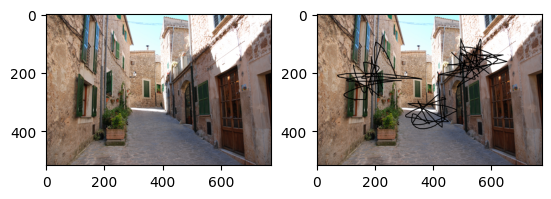

In [2]:
img = cv.imread("images/alley.jpg")
img_degraded = cv.imread("images/alley_strokes.jpg")

H,W = img.shape[:2]
PSNR = 10 * log10(255**2 / (((img_degraded - img)**2).sum() / (H*W*3)))
print(f"PSNR={PSNR:.4f}")

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(img_degraded, cv.COLOR_BGR2RGB))

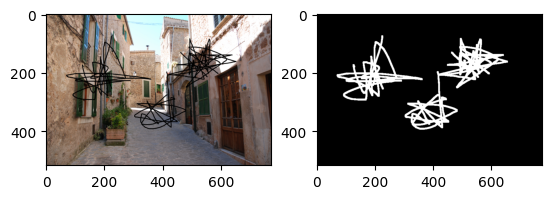

In [3]:
mask = cv.cvtColor(img_degraded, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(mask, 2, 255, cv.THRESH_BINARY_INV)
mask = cv.dilate(mask, kernel=np.ones((3, 3), np.uint8), iterations=2)
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(img_degraded, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray', vmin=0, vmax=255)

PSNR=39.9499


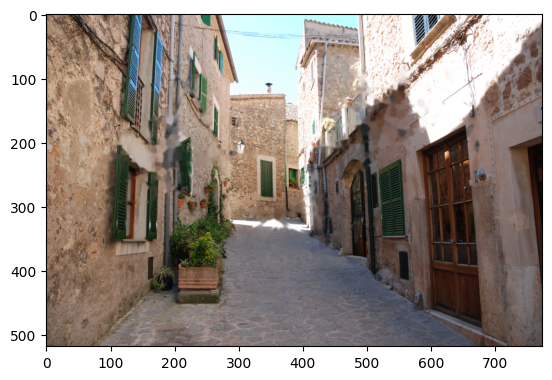

In [4]:
fast_marching = cv.inpaint(img_degraded, mask, 3, cv.INPAINT_TELEA)
H, W = fast_marching.shape[:2]
PSNR = 10 * log10(255**2 / (((fast_marching - img)**2).sum() / (H*W*3)))
print(f"PSNR={PSNR:.4f}")
plt.imshow(cv.cvtColor(fast_marching, cv.COLOR_BGR2RGB))

PSNR=39.9749


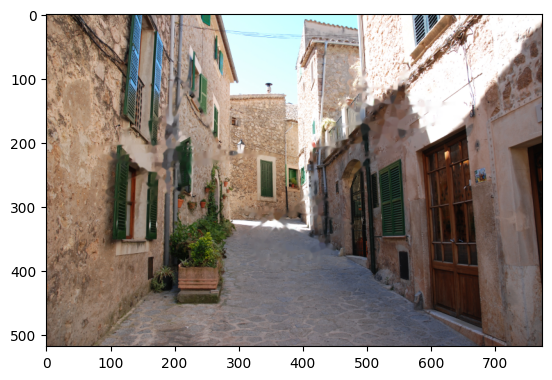

In [5]:
navier = cv.inpaint(img_degraded, mask, 3, cv.INPAINT_NS)
PSNR = 10 * log10(255**2 / (((navier - img)**2).sum() / (H*W*3)))
print(f"PSNR={PSNR:.4f}")
plt.imshow(cv.cvtColor(navier, cv.COLOR_BGR2RGB))